<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/DL/Redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Recurrentes


Las redes convolucionales son un tipo de arquitectura de redes neuronales artificiales que han demostrado ser muy efectivas en el procesamiento y clasificación de imágenes. Utilizan filtros convolucionales que escanean la imagen pixel a pixel, capturando patrones en diferentes niveles de detalle. Estos filtros se combinan en capas convolucionales para extraer características cada vez más abstractas de la imagen.

Además de las capas convolucionales, las redes convolucionales también incluyen capas de pooling para reducir la dimensión de la imagen y capas totalmente conectadas para clasificar las características extraídas en categorías específicas.

Las redes convolucionales han demostrado ser muy efectivas en una amplia gama de aplicaciones de visión por computadora, incluyendo reconocimiento de objetos, detección de rostros, segmentación de imágenes y más. También se han utilizado con éxito en otros campos, como el procesamiento de señales y el procesamiento del lenguaje natural.

In [1]:
# LLAMAN LAS LIBRERIAS NECESARIAS

import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io

from matplotlib.image import imread

# sE CONECTA CON DRIVE PARA DESCARGAR IMAGEN DE 7X7X3

# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth

from oauth2client.client import GoogleCredentials 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Instalar la biblioteca Pillow
!pip install pillow

# Importar bibliotecas necesarias
from PIL import Image
import io

# Descargar la imagen desde Google Drive
image_id = '1syXUIzjd0eJft4zKUKVebDvYS3PK5_7-'
download = drive.CreateFile({'id': image_id})
download.GetContentFile('cuadrado7x7.jpg') # Guarda la imagen en un archivo temporal

# Leer la imagen y visualizarla
image = Image.open('cuadrado7x7.jpg')
image.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


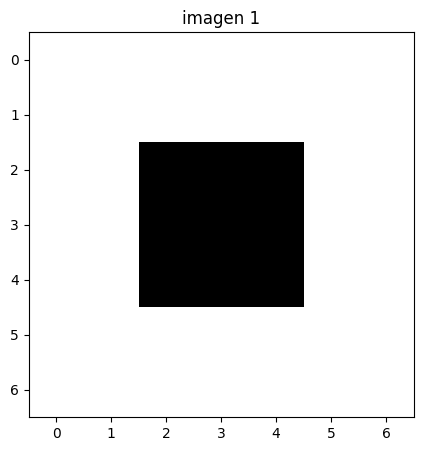

In [2]:
# se convierte en numpy para traer la tercera dimencion, la escala de color.
imagen = np.array(image)
# plot inicial
plt.figure(figsize=(5,5))
plt.title('imagen 1')
plt.imshow(imagen)

In [3]:
#Se pasa a escala de grises para quitar tercera dimencion, queda 7X7X1
imagen_2 = color.rgb2gray(imagen)
imagenBN = imagen_2
print('Dimenciones matriz :', imagenBN.shape)
imagenBN

Dimenciones matriz : (7, 7)


array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

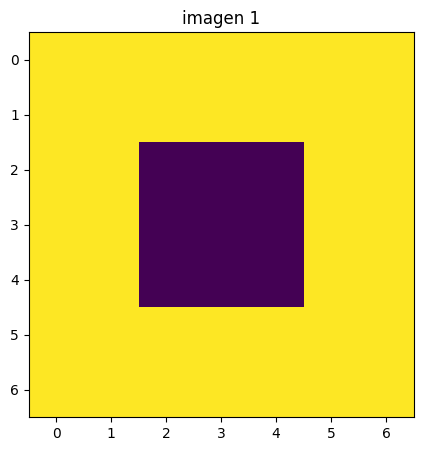

In [4]:
plt.figure(figsize=(5,5))
plt.title('imagen 1')
plt.imshow(imagenBN)

Se crea un kernel para demostrar el paso de la convolución.

In [5]:
#filtro de convolución 2D también conocido como filtro Laplaciano. 
#Un filtro Laplaciano se utiliza para realzar los bordes y los detalles de una imagen. 
 
kernel = np.array((
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
    ), dtype = 'float')

# Proceso convolución

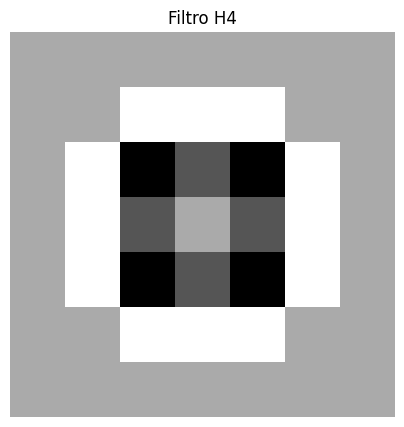

In [6]:
# Realizar la convolución 2D de la imagen en escala de grises (imagenBN) con un kernel dado
conv = signal.convolve2d(imagenBN, kernel, boundary='symm', mode='same')

# Crear una nueva figura de tamaño 5x5 (pulgadas)
plt.figure(figsize=(5, 5))

# Establecer el título de la figura como "Filtro H4"
plt.title("Filtro H4")

# Desactivar los ejes para obtener una visualización limpia de la imagen
plt.axis('off')

# Mostrar la imagen convolucionada en escala de grises
plt.imshow(conv, cmap='gray')

# Redes Convolucionales predicción Perros y Gatos

Este código es un ejemplo de cómo se puede utilizar una red neuronal convolucional para la clasificación de imágenes de perros y gatos. Se utiliza la librería Keras para definir la arquitectura de la red y entrenarla.

El proceso comienza montando Google Drive, desde donde se va a descargar un archivo comprimido con las imágenes de entrenamiento y validación, en carpetas separadas de perros y gatos. Se extraen las imágenes y se crea un objeto ImageDataGenerator que se encargará de cargar las imágenes a medida que el modelo las necesite. Además, se crea la estructura de la red convolucional.

La red convolucional consta de varias capas que procesan las imágenes en diferentes formas. Primero se tienen las capas de convolución, que aplican un conjunto de filtros a la imagen para resaltar características específicas, como bordes o patrones. Luego, se utiliza una capa de pooling para reducir el tamaño de la imagen y disminuir la cantidad de parámetros que deben ser aprendidos. Después de varias capas de convolución y pooling, se utiliza una capa de flatten para aplanar la imagen en un vector unidimensional. Por último, se utilizan capas densas para realizar la clasificación.

El modelo se entrena con las imágenes de entrenamiento y se valida con las imágenes de validación. Después de entrenar el modelo, se pueden hacer predicciones con nuevas imágenes de perros o gatos utilizando la función predict.

In [7]:
# Importar las liobrerías y paquetes
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

import pandas as pd

In [8]:
# Descargar la imagen desde Google Drive
folder = '1PlF-DNvFETknsJu5XUpRxFnK8bKeSG0P'
download = drive.CreateFile({'id': folder})
download.GetContentFile('dataset.zip') # Guarda la imagen en un archivo temporal

!unzip -q dataset.zip | head -n 5

replace dataset/single_prediction/cat_or_dog_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [9]:
PATH = '/content/dataset'

print(os.listdir(PATH))

train_dir = os.path.join(PATH,
                         'training_set')
test_dir = os.path.join(PATH,
                        'test_set')
validation_dir = os.path.join(PATH,
                         'validation_set')

# train_cats_dir = os.path.join(train_dir, 'cats') # train_dogs_dir = os.path.join(train_dir, 'dogs')
# test_cats_dir = os.path.join(test_dir, 'cats') #  test_dogs_dir = os.path.join(test_dir, 'dogs')
# validation_cats_dir = os.path.join(validation_dir, 'cats')  #  validation_dogs_dir = os.path.join(validation_dir,'dogs')

['validation_set', 'test_set', 'training_set', 'single_prediction']


In [28]:
from keras.preprocessing.image import ImageDataGenerator 

#valores  de entrada:

pixel=150 #imagenes de 150 pixeles
size=20
epocas=10

train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(pixel, pixel),
    color_mode="grayscale",
    batch_size=size,
    class_mode='binary',
    shuffle=True,
    seed=42
)


Found 2000 images belonging to 2 classes.


In [30]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="grayscale",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

Found 500 images belonging to 2 classes.


In [31]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="grayscale",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

Found 500 images belonging to 2 classes.


Una red convolucional (Convolutional Neural Network o CNN) es un tipo de red neuronal profunda que se utiliza principalmente para tareas de clasificación y reconocimiento de imágenes.

La clase Sequential de Keras es una forma sencilla de crear una red neuronal apilando capas de manera secuencial. En el caso de una red convolucional, estas capas suelen ser capas convolucionales, de agrupación (pooling) y de activación.

Aquí te muestro un ejemplo de cómo se podría definir una red convolucional en Keras utilizando Sequential y agregarle una capa de clasificación (fully-connected) al final:

In [32]:
classifier = Sequential()

# Paso 1: Convolución



Esta es una capa de convolución en una red neuronal convolucional (CNN). A continuación se explican los argumentos utilizados:

filters: número de filtros (también conocidos como kernels) que se aplicarán a la imagen de entrada para producir las características en la siguiente capa. En este caso, se utilizan 32 filtros.

padding: especifica cómo se debe rellenar la imagen de entrada en el borde para que la convolución no reduzca la resolución de la imagen de salida. En este caso, se utiliza same para que el tamaño de la salida sea el mismo que el tamaño de la entrada.

kernel_size: tamaño del filtro. En este caso, se utiliza un filtro de 3x3.

use_bias: indica si se utilizará un sesgo (bias) en la convolución. En este caso, se establece en 1 para usar un sesgo.

input_shape: forma de la imagen de entrada. En este caso, la imagen de entrada tiene una forma de (pixel, pixel, 1), donde pixel se refiere al tamaño de la imagen y 1 indica que es una imagen en escala de grises.

activation: función de activación que se aplicará después de la convolución. En este caso, se utiliza la función de activación relu.

En resumen, esta capa de convolución aplicará 32 filtros de 3x3 a una imagen de entrada en escala de grises de tamaño (pixel, pixel) y aplicará una función de activación ReLU a la salida.

In [33]:
# Convolución
capa11=Conv2D(filters = 32,
              padding='same',
              kernel_size = (3, 3),
              use_bias=1,
              input_shape = (pixel, pixel, 1), 
              activation = "relu")

#paso 2: max Pooling

MaxPooling2D y Dropout son capas comunes en las redes convolucionales:

MaxPooling2D es una técnica para reducir el tamaño de los mapas de características al seleccionar el valor máximo dentro de una ventana de tamaño determinado y deslizarla por toda la imagen. Esta técnica se utiliza para disminuir el tamaño de la entrada y así reducir la complejidad del modelo y disminuir el overfitting.

Dropout es una técnica para regularizar la red neuronal y prevenir el overfitting. Durante el entrenamiento, la capa Dropout selecciona aleatoriamente algunas neuronas y las apaga (es decir, establece sus valores a cero). Esto hace que otras neuronas se activen y se fortalezcan para compensar la pérdida, lo que reduce la dependencia de ciertas neuronas y hace que la red sea más robusta y generalizable.

En el código que has proporcionado, capa12 es una capa de pooling que reduce el tamaño de la imagen de entrada y capa13 es una capa Dropout con una tasa de 0.25, lo que significa que se apagan aleatoriamente el 25% de las neuronas durante el entrenamiento.

In [34]:
capa12=MaxPooling2D(pool_size = (2,2))
capa13=Dropout(0.25)

# Capa 2


Al igual que la capa anterior, está configurada para tener 64 filtros, cada uno con una dimensión de 3x3. La opción padding='same' significa que se rellena con ceros alrededor del borde de la imagen de entrada para que la salida tenga las mismas dimensiones que la entrada. La opción use_bias=1 significa que se utilizan los sesgos. Y la función de activación utilizada en esta capa es "relu", que es una función no lineal comúnmente utilizada en redes neuronales convolucionales.

In [35]:
capa21=Conv2D(filters = 64,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")

In [36]:
capa22=MaxPooling2D(pool_size = (2,2))
capa23=Dropout(0.25)

# Capa 3



Esta línea de código define la tercera capa de convolución en la red neuronal convolucional. La capa se llama capa31 y es un objeto de la clase Conv2D que realiza la convolución de una imagen de entrada con 128 filtros de 3x3 píxeles cada uno.

Los parámetros de la capa son:

filters: número de filtros que se utilizan en la convolución.
padding: tipo de relleno que se aplica en los bordes de la imagen de entrada. En este caso, padding='same' indica que se realiza un relleno para que la salida tenga el mismo tamaño que la imagen de entrada.
kernel_size: tamaño del kernel o filtro de convolución. En este caso, se utiliza un kernel de 3x3 píxeles.
use_bias: especifica si se utiliza un término de sesgo en la operación de convolución. En este caso, se utiliza un término de sesgo con use_bias=1.
activation: función de activación que se aplica a la salida de la capa. En este caso, se utiliza la función de activación ReLU (activation="relu") para introducir no-linealidad en la red.

In [37]:
capa31=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")

In [38]:
capa32=MaxPooling2D(pool_size = (2,2))
capa33=Dropout(0.25)

# Capa 4

Esta es otra capa de convolución que tiene 128 filtros (también conocidos como kernels o detectores de características) y un tamaño de kernel de (3, 3), lo que significa que cada filtro tendrá una ventana deslizante de 3x3 píxeles en la imagen de entrada. El padding es "same", lo que significa que la salida tendrá la misma forma que la entrada. El parámetro use_bias se establece en 1 para incluir sesgos en la capa. Finalmente, la función de activación "relu" se utiliza para introducir no linealidad en la capa.

In [39]:
capa41=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")

In [40]:
capa42=MaxPooling2D(pool_size = (2,2))
capa43=Dropout(0.25)

La capa Flatten() se utiliza para aplanar el tensor de características (feature map) obtenido a partir de las capas convolucionales y de pooling, para que pueda ser procesado por las capas densas (fully connected layers).

El tensor de características es una matriz multidimensional que contiene la información de las características extraídas de las imágenes en cada una de las capas convolucionales y de pooling. La capa Flatten() se encarga de "aplanar" este tensor para que pueda ser pasado como entrada a las capas densas.

Por ejemplo, si tenemos un tensor de características de dimensiones 9x9x128 (9 filas, 9 columnas y 128 canales), la capa Flatten() lo transformará en un vector de 6272 elementos (9x9x128=10.368), que será la entrada de las capas densas.

In [41]:
capa51=Flatten()

Estas dos capas corresponden a la parte densa de la red neuronal, donde las características extraídas por las capas convolucionales se "aplanan" y se alimentan a una red de neuronas totalmente conectadas.

La primera capa densa tiene 512 neuronas y utiliza la función de activación ReLU (rectified linear unit), que es una función no lineal que asigna valores negativos a cero y los valores positivos los mantiene igual. Esta capa ayuda a extraer características más complejas de las imágenes y aporta robustez al modelo.

La segunda capa densa tiene una sola neurona y utiliza la función de activación sigmoide, que produce una salida en el rango de 0 a 1, que representa la probabilidad de que la imagen de entrada pertenezca a la clase positiva (perro) o a la clase negativa (gato). Esta capa es la capa de salida del modelo.

In [42]:
capa61=Dense(512, use_bias=1, activation = "relu")
capa62=Dense(1, use_bias=1, activation = "sigmoid")

In [43]:
#Armado

classifier.add(capa11)
classifier.add(capa12)

classifier.add(capa21)
classifier.add(capa22)

classifier.add(capa31)
classifier.add(capa32)

classifier.add(capa41)
classifier.add(capa42)

classifier.add(capa51)

classifier.add(capa61)
classifier.add(capa62)

classifier.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   #optimizer = "sgd",
                   #optimizer = "rmsprop",
                   metrics=['acc', 'mse'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

train_generator.n devuelve el número total de imágenes en el conjunto de datos de entrenamiento, y train_generator.batch_size indica el tamaño del lote utilizado para el entrenamiento. Dividiendo el número total de imágenes por el tamaño del lote, se obtiene el número de pasos necesarios para recorrer todo el conjunto de datos. Esto se hace para que la red neuronal pueda entrenar en varias etapas en lugar de una sola etapa, lo que ayuda a evitar problemas de memoria.

Lo mismo se aplica para el conjunto de datos de validación: validation_generator.n devuelve el número total de imágenes en el conjunto de datos de validación, y validation_generator.batch_size indica el tamaño del lote utilizado para la validación. Dividiendo el número total de imágenes por el tamaño del lote, se obtiene el número de pasos necesarios para recorrer todo el conjunto de datos de validación.

In [44]:
pasos_entrenamiento=train_generator.n//train_generator.batch_size
#pasos_entrenamiento=1
pasos_validacion=validation_generator.n//validation_generator.batch_size
#pasos_validacion=1

Aquí se utiliza el método fit de Keras para entrenar el modelo. Los parámetros que se están utilizando son los siguientes:
<ol><il> 
<li>train_generator: Es el conjunto de datos de entrenamiento, que se generó previamente utilizando el generador de imágenes. Es una instancia de la clase ImageDataGenerator.</br></li>
<li>epochs: Es el número de épocas que se utilizarán para entrenar el modelo. Una época es una pasada completa por todo el conjunto de datos.</br></li>
<li>steps_per_epoch: Es el número de pasos que se toman en cada época del conjunto de entrenamiento. Un paso es una actualización de los pesos del modelo. Este valor se calcula como el número de muestras de entrenamiento dividido por el tamaño del lote de entrenamiento (batch_size).</br></li>
<li>validation_data: Es el conjunto de datos de validación, que también se generó previamente utilizando el generador de imágenes. Es una instancia de la clase ImageDataGenerator.</br></li>
<li>validation_steps: Es similar a steps_per_epoch, pero se utiliza para el conjunto de validación.</br></li>
<li>shuffle: Este parámetro determina si las muestras se barajan antes de cada época de entrenamiento.</br></li> </li> </ol>

En resumen, esta parte del código entrena el modelo de redes neuronales convolucionales utilizando los datos de entrenamiento y validación, y devuelve un objeto History que contiene información sobre el proceso de entrenamiento.

In [45]:
#"""
cnn=classifier.fit(train_generator, #conjunto de entrenamiento
               #y_test se toma de las etiquetas de los datos automaticamente
               #https://stackoverflow.com/questions/62116637/y-argument-is-not-supported-when-using-keras-utils-sequence-as-input-error
               #validation_generator, #conjunto de test
               epochs=epocas, #Cuantas epocas usaremos para entrenar
               steps_per_epoch=pasos_entrenamiento,
               validation_data=(validation_generator),
               validation_steps=pasos_validacion,
               shuffle=True
              ) 
#"""

Epoch 1/10
100/100 [==============================] - 159s 2s/step - loss: 0.6965 - acc: 0.5125 - mse: 0.2516 - val_loss: 0.6927 - val_acc: 0.5000 - val_mse: 0.2498
Epoch 2/10
100/100 [==============================] - 144s 1s/step - loss: 0.6937 - acc: 0.5085 - mse: 0.2503 - val_loss: 0.6933 - val_acc: 0.5000 - val_mse: 0.2501
Epoch 3/10
100/100 [==============================] - 143s 1s/step - loss: 0.6936 - acc: 0.5005 - mse: 0.2502 - val_loss: 0.6931 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 4/10
100/100 [==============================] - 142s 1s/step - loss: 0.6922 - acc: 0.5160 - mse: 0.2495 - val_loss: 0.6893 - val_acc: 0.5600 - val_mse: 0.2481
Epoch 5/10
100/100 [==============================] - 144s 1s/step - loss: 0.6844 - acc: 0.5490 - mse: 0.2454 - val_loss: 0.6898 - val_acc: 0.5040 - val_mse: 0.2483
Epoch 6/10
100/100 [==============================] - 141s 1s/step - loss: 0.6840 - acc: 0.5530 - mse: 0.2454 - val_loss: 0.6758 - val_acc: 0.6300 - val_mse: 0.2414
Epoch 7/10

Se  carga una imagen de prueba en escala de grises usando load_img() de Keras. Luego convierte la imagen en un array usando img_to_array(). Después, agrega una dimensión adicional al array con expand_dims(), de manera que el array tenga la forma (1, pixel, pixel, 1) donde pixel es el tamaño de la imagen. Esto se debe a que predict() espera una lista de imágenes en el formato (batch_size, height, width, channels). Luego, predict() se usa para predecir si la imagen es de un perro o un gato. Finalmente, se imprime la clase predicha usando un condicional if-else.

In [46]:
import numpy as np
import keras.utils as image
import os

test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (pixel, pixel),color_mode='grayscale')

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'


predictions = classifier.predict(validation_generator)
y_pred_df = pd.DataFrame(predictions)
y_pred_df=np.round(y_pred_df)


true_classes = validation_generator.classes
y_test_df = pd.DataFrame(true_classes)


class_labels = list(validation_generator.class_indices.keys())   
class_labels

25/25 [==============================] - 12s 476ms/step


['cats', 'dogs']



Este código evalúa el modelo entrenado utilizando el conjunto de datos de entrenamiento (train_generator). La función evaluate() de Keras devuelve la pérdida y la métrica (precisión en este caso) del modelo en el conjunto de datos de entrenamiento.

En este caso, steps es el número de pasos que se utilizan para evaluar el modelo, y se calcula dividiendo el número total de imágenes en el conjunto de datos de entrenamiento (train_generator.n) entre el tamaño del lote (train_generator.batch_size).

Finalmente, el código imprime la precisión del modelo en el conjunto de datos de entrenamiento multiplicando el valor de la métrica (precisión) por 100.

In [47]:
#Train
scores = classifier.evaluate(train_generator, steps=pasos_entrenamiento)
print('TRAIN: ',"\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

#Test
scores = classifier.evaluate(test_generator,steps=pasos_validacion)
print('TEST: ',"\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

from sklearn.metrics import classification_report
report = classification_report(y_pred_df, y_test_df, target_names=class_labels)
print(report)   

100/100 [==============================] - 45s 445ms/step - loss: 0.4897 - acc: 0.7705 - mse: 0.1612
TRAIN:  
acc: 77.05%
25/25 [==============================] - 12s 481ms/step - loss: 0.6391 - acc: 0.6340 - mse: 0.2227
TEST:  
acc: 63.40%
              precision    recall  f1-score   support

        cats       0.58      0.51      0.55       282
        dogs       0.45      0.52      0.48       218

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.51       500
weighted avg       0.52      0.52      0.52       500



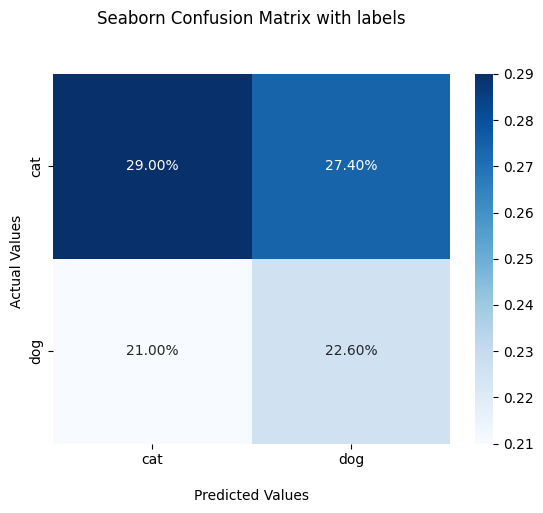

In [48]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_pred_df, y_test_df)

import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['cat','dog'])
ax.yaxis.set_ticklabels(['cat','dog'])

## Display the visualization of the Confusion Matrix.
plt.show()

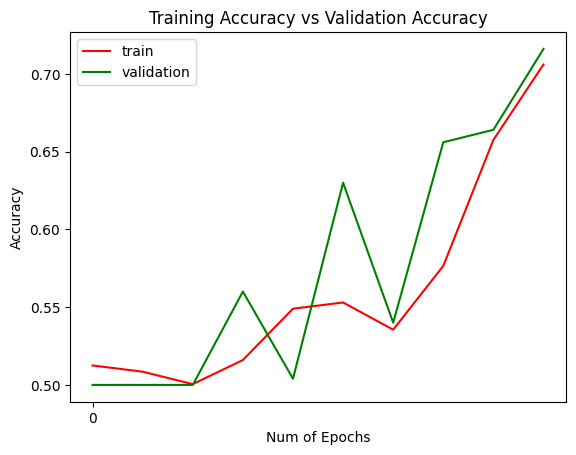

In [49]:
plt.figure(0)  
plt.plot(cnn.history['acc'],'r')  
plt.plot(cnn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 2, 100))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

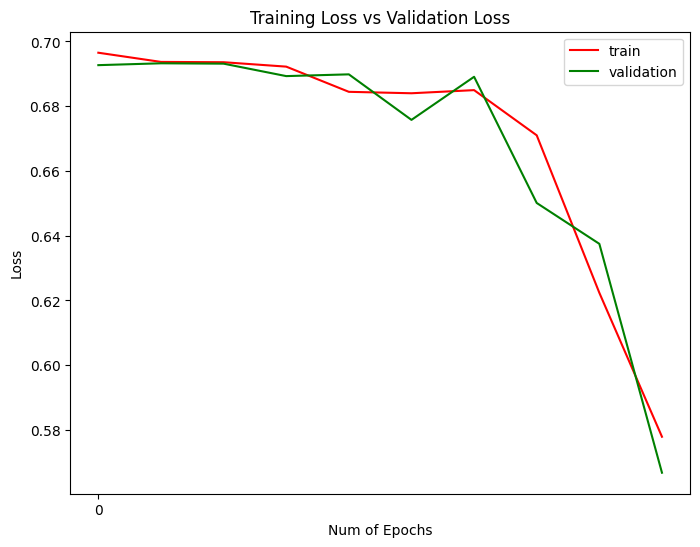

In [50]:
plt.figure(1)  
plt.plot(cnn.history['loss'],'r')  
plt.plot(cnn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 2, 100))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 

# Red 2: Se agrega Dropout

Dropout es una técnica muy utilizada en redes neuronales para evitar el sobreajuste (overfitting). El sobreajuste es un problema común en el aprendizaje automático, donde el modelo se ajusta demasiado a los datos de entrenamiento y no es capaz de generalizar bien para datos nuevos y no vistos.

Dropout consiste en apagar aleatoriamente (con cierta probabilidad) algunas de las neuronas en una capa durante el entrenamiento. Esto fuerza a la red a aprender características útiles en varias combinaciones de neuronas, lo que la hace más robusta y menos propensa al sobreajuste. Durante la inferencia, todas las neuronas están activas y se utilizan todas las combinaciones aprendidas durante el entrenamiento para hacer una predicción.

En resumen, Dropout ayuda a prevenir el sobreajuste de la red al apagar aleatoriamente algunas de las neuronas en una capa durante el entrenamiento, lo que fuerza a la red a aprender características útiles en varias combinaciones de neuronas.




In [51]:
# Inicializar la CNN
classifier_2 = Sequential()

<ol>
<li>Conv2D: una capa de convolución 2D que aplica una convolución a la entrada. La convolución es una operación matemática que aplica un filtro a la entrada para producir una salida. En este caso, el filtro es un kernel de 3x3 y se utilizan 32 filtros. </li>

<li>Conv2D aprende las características importantes de la imagen a través de la convolución.</li>

<li>MaxPooling2D: una capa de agrupación que reduce la dimensión espacial de la salida de la capa anterior. En este caso, se utiliza un agrupamiento máximo de 2x2.</li>

<li>Dropout: una técnica de regularización que ayuda a reducir el sobreajuste en la red neuronal. Durante el entrenamiento, esta capa apaga aleatoriamente algunas de las neuronas para que la red no se vuelva demasiado dependiente de ninguna neurona en particular. En este caso, el parámetro de dropout es 0.25, lo que significa que se apagan el 25% de las neuronas.</li>
</ol>

In [52]:
# Convolución
capa2_11=Conv2D(filters = 32,
              padding='same',
              kernel_size = (3, 3),
              use_bias=1,
              input_shape = (pixel, pixel, 1), 
              activation = "relu")
capa2_12=MaxPooling2D(pool_size = (2,2))
capa2_13=Dropout(0.25)


## Capa 2

La capa Conv2D realiza la convolución de los datos de entrada con un conjunto de filtros que extraen características de las imágenes. En este caso, se definen 64 filtros con un tamaño de kernel de 3x3 y se especifica la función de activación ReLU.

La capa MaxPooling2D reduce la dimensión espacial de la salida de la capa anterior, lo que ayuda a reducir la cantidad de parámetros y el tiempo de procesamiento. En este caso, se utiliza un tamaño de ventana de 2x2 para reducir la imagen a la mitad en ambas dimensiones.

La capa Dropout aplica una técnica de regularización para evitar el sobreajuste del modelo. Durante el entrenamiento, se apaga aleatoriamente una fracción de las neuronas de la capa anterior para que no se dependa demasiado de una sola neurona. En este caso, se apaga el 25% de las neuronas en la capa anterior.

In [53]:
capa2_21=Conv2D(filters = 64,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")

capa2_22=MaxPooling2D(pool_size = (2,2))
capa2_23=Dropout(0.25)



La capa Conv2D con filters = 128 realiza la convolución con 128 filtros de tamaño (3, 3) y con un padding de 'same', lo que significa que el tamaño de la salida será el mismo que el de la entrada, es decir (pixel, pixel, 128). La capa utiliza la función de activación relu que se encarga de eliminar los valores negativos de la salida de la capa anterior.

La capa MaxPooling2D con pool_size = (2, 2) reduce a la mitad el tamaño de la salida de la capa anterior en ambas dimensiones (width y height) y así se disminuye la complejidad del modelo y se reduce el overfitting.

La capa Dropout con una probabilidad de 0.25 descarta aleatoriamente el 25% de las salidas de la capa anterior, lo que ayuda a evitar el overfitting.

In [54]:
capa2_31=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")
capa2_32=MaxPooling2D(pool_size = (2,2))
capa2_33=Dropout(0.25)

Estas son tres capas que forman una estructura convolucional de la red neuronal. La capa Conv2D realiza una convolución 2D en la imagen de entrada. La convolución es una operación matemática que se utiliza para extraer características de la imagen de entrada. La capa MaxPooling2D realiza un submuestreo en la salida de la capa de convolución, reduciendo el tamaño de la salida y manteniendo sólo la información más importante. Por último, la capa Dropout se utiliza para prevenir el sobreajuste de la red. Apaga un porcentaje de las neuronas de la capa anterior durante el entrenamiento, lo que obliga a la red a aprender características más robustas y a evitar la memorización de los datos de entrenamiento.

In [55]:
capa2_41=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")
capa2_42=MaxPooling2D(pool_size = (2,2))
capa2_43=Dropout(0.25)

Estas son las capas de la red neuronal densa que se utilizan después de las capas de convolución.

La capa "Flatten" se utiliza para aplanar la matriz resultante de la última capa de convolución en un vector unidimensional, que luego se usa como entrada para las capas densas.

La capa "Dense" es una capa completamente conectada en la que cada neurona está conectada a todas las neuronas de la capa anterior. En la primera capa densa (capa61) se utilizan 512 neuronas con función de activación ReLU. En la última capa densa (capa62) se utiliza una neurona con función de activación sigmoide para la clasificación binaria de perros o gatos.

In [56]:
capa2_51=Flatten()
capa2_61=Dense(512, use_bias=1, activation = "relu")
capa2_62=Dense(1, use_bias=1, activation = "sigmoid")

In [57]:
classifier_2.add(capa2_11)
classifier_2.add(capa2_12)
classifier_2.add(capa2_13)
classifier_2.add(capa2_21)
classifier_2.add(capa2_22)
classifier_2.add(capa2_23)
classifier_2.add(capa2_31)
classifier_2.add(capa2_32)
classifier_2.add(capa2_33)
classifier_2.add(capa2_41)
classifier_2.add(capa2_42)
classifier_2.add(capa2_43)
classifier_2.add(capa2_51)
classifier_2.add(capa2_61)
classifier_2.add(capa2_62)


classifier_2.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   #optimizer = "sgd",
                   #optimizer = "rmsprop",
                   metrics=['acc', 'mse'])

classifier_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 37, 37, 64)       

In [58]:
pasos_entrenamiento=train_generator.n//train_generator.batch_size
#pasos_entrenamiento=1
pasos_validacion=validation_generator.n//validation_generator.batch_size
#pasos_validacion=1

In [59]:
#"""
cnn_2=classifier_2.fit(train_generator, #conjunto de entrenamiento
               #y_test se toma de las etiquetas de los datos automaticamente
               #https://stackoverflow.com/questions/62116637/y-argument-is-not-supported-when-using-keras-utils-sequence-as-input-error
               #validation_generator, #conjunto de test
               epochs=epocas, #Cuantas epocas usaremos para entrenar
               steps_per_epoch=pasos_entrenamiento,
               validation_data=(validation_generator),
               validation_steps=pasos_validacion,
               shuffle=True
              ) 
#"""

Epoch 1/10
100/100 [==============================] - 175s 2s/step - loss: 0.7187 - acc: 0.5030 - mse: 0.2526 - val_loss: 0.6932 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 2/10
100/100 [==============================] - 153s 2s/step - loss: 0.6933 - acc: 0.5000 - mse: 0.2501 - val_loss: 0.6932 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 3/10
100/100 [==============================] - 146s 1s/step - loss: 0.6932 - acc: 0.4740 - mse: 0.2500 - val_loss: 0.6931 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 4/10
100/100 [==============================] - 145s 1s/step - loss: 0.6932 - acc: 0.4960 - mse: 0.2500 - val_loss: 0.6931 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 5/10
100/100 [==============================] - 142s 1s/step - loss: 0.6932 - acc: 0.4985 - mse: 0.2500 - val_loss: 0.6931 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 6/10
100/100 [==============================] - 132s 1s/step - loss: 0.6932 - acc: 0.4865 - mse: 0.2500 - val_loss: 0.6931 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 7/10

In [60]:
predictions_2 = classifier_2.predict(validation_generator)
y_pred_df_2 = pd.DataFrame(predictions_2)
y_pred_df_2 =np.round(y_pred_df_2)


true_classes_2 = validation_generator.classes
y_test_df_2 = pd.DataFrame(true_classes_2)


class_labels_2 = list(validation_generator.class_indices.keys())   


#Train
scores = classifier_2.evaluate(train_generator, steps=pasos_entrenamiento)
print('TRAIN: ',"\n%s: %.2f%%" % (classifier_2.metrics_names[1], scores[1]*100))

#Validación
scores = classifier_2.evaluate(validation_generator,steps=pasos_validacion)
print('VALIDACIÓN: ',"\n%s: %.2f%%" % (classifier_2.metrics_names[1], scores[1]*100))

#Test
scores = classifier_2.evaluate(test_generator,steps=pasos_validacion)
print('TEST: ',"\n%s: %.2f%%" % (classifier_2.metrics_names[1], scores[1]*100))

from sklearn.metrics import classification_report
report = classification_report(y_pred_df_2, y_test_df_2, target_names=class_labels)
print(report)   

100/100 [==============================] - 35s 345ms/step - loss: 0.6931 - acc: 0.5000 - mse: 0.2500
TRAIN:  
acc: 50.00%
25/25 [==============================] - 9s 344ms/step - loss: 0.6931 - acc: 0.5000 - mse: 0.2500
VALIDACIÓN:  
acc: 50.00%
25/25 [==============================] - 10s 377ms/step - loss: 0.6931 - acc: 0.5000 - mse: 0.2500
TEST:  
acc: 50.00%
              precision    recall  f1-score   support

        cats       0.00      0.00      0.00         0
        dogs       1.00      0.50      0.67       500

    accuracy                           0.50       500
   macro avg       0.50      0.25      0.33       500
weighted avg       1.00      0.50      0.67       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Red 3: BN-DA-Droout


In [61]:
train_datagen = ImageDataGenerator(rescale = 1./255,        #normalizado de la imagen
                                   rotation_range=40,       #rotacion 40°   
                                   width_shift_range=0.2,   #traslado vertical 
                                   height_shift_range=0.2,  #traslado horizontal
                                   shear_range = 0.2,       #inclinación de la imagen 
                                   zoom_range = 0.2,        #aumento
                                   horizontal_flip = True,  #flip horizontal
                                   fill_mode = 'nearest'    #relleno de pixeles despues de transformacion
                                  )   
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [62]:
train_generator = train_datagen.flow_from_directory(
    train_dir,    #directorio
    target_size=(pixel, pixel),      #reescalado
    color_mode="grayscale",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="grayscale",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="grayscale",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.



Esta red es similar a las anteriores, con algunas diferencias en las capas. Aquí se agregaron capas de regularización como Batch Normalization y Dropout para reducir el overfitting.

La primera capa convolucional tiene 32 filtros, y se utiliza el padding "same" para que el tamaño de la imagen de salida sea el mismo que el de entrada. También se agrega una capa de MaxPooling con un tamaño de ventana de (2,2) para reducir el tamaño de la imagen a la mitad. Luego se agrega una capa de Dropout para regularizar el modelo.

La segunda capa convolucional tiene 64 filtros, seguida por una capa de MaxPooling y otra de Dropout.

La tercera capa convolucional tiene 128 filtros, seguida por una capa de MaxPooling y otra de Dropout.

La cuarta capa convolucional es similar a la tercera, con 128 filtros, y se agrega una capa de MaxPooling y Dropout.

Luego se agrega una capa de Flattening para convertir la imagen en un vector, y dos capas densas para la clasificación.

Finalmente, el modelo se compila con la función de pérdida de entropía cruzada binaria, el optimizador Adam y se mide la precisión y el error cuadrático medio.

In [63]:
classifier_3 = Sequential()
# Convolución
capa3_11=Conv2D(filters = 32,
              padding='same',
              kernel_size = (3, 3),
              use_bias=1,
              input_shape = (pixel, pixel, 1), 
              activation = "relu")
capa3_12=MaxPooling2D(pool_size = (2,2))
capa3_13=Dropout(0.25)

#capa 2
capa3_21=Conv2D(filters = 64,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")
capa3_22=MaxPooling2D(pool_size = (2,2))
capa3_23=Dropout(0.25)

#Capa 3

capa3_31=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")
capa3_32=MaxPooling2D(pool_size = (2,2))
capa3_33=Dropout(0.25)

#Capa 4
capa3_41=Conv2D(filters = 128,
             padding='same',
             kernel_size = (3, 3),
             use_bias=1,
             activation = "relu")
capa3_42=MaxPooling2D(pool_size = (2,2))
capa3_43=Dropout(0.25)

#Flattening
capa3_51=Flatten()
#Full conected
capa3_61=Dense(512, use_bias=1, activation = "relu")
capa3_62=Dense(1, use_bias=1, activation = "sigmoid")

classifier_3.add(capa3_11)
classifier_3.add(capa3_12)
classifier_3.add(capa3_21)
classifier_3.add(capa3_22)
classifier_3.add(capa3_31)
classifier_3.add(capa3_32)
classifier_3.add(capa3_41)
classifier_3.add(capa3_42)
classifier_3.add(capa3_51)
classifier_3.add(capa3_61)
classifier_3.add(capa3_62)


classifier_3.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   #optimizer = "sgd",
                   #optimizer = "rmsprop",
                   metrics=['acc', 'mse'])

classifier_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 128)     

In [64]:
pasos_entrenamiento=train_generator.n//train_generator.batch_size
#pasos_entrenamiento=1
pasos_validacion=validation_generator.n//validation_generator.batch_size
#pasos_validacion=1

#"""
cnn_3=classifier_3.fit(train_generator, #conjunto de entrenamiento
               #y_test se toma de las etiquetas de los datos automaticamente
               #https://stackoverflow.com/questions/62116637/y-argument-is-not-supported-when-using-keras-utils-sequence-as-input-error
               #validation_generator, #conjunto de test
               epochs=epocas, #Cuantas epocas usaremos para entrenar
               steps_per_epoch=pasos_entrenamiento,
               validation_data=(validation_generator),
               validation_steps=pasos_validacion,
               shuffle=True
              ) 
#"""

Epoch 1/10
100/100 [==============================] - 134s 1s/step - loss: 0.6952 - acc: 0.4925 - mse: 0.2509 - val_loss: 0.6918 - val_acc: 0.5060 - val_mse: 0.2493
Epoch 2/10
100/100 [==============================] - 128s 1s/step - loss: 0.6941 - acc: 0.5185 - mse: 0.2504 - val_loss: 0.6925 - val_acc: 0.5020 - val_mse: 0.2497
Epoch 3/10
100/100 [==============================] - 133s 1s/step - loss: 0.6921 - acc: 0.5260 - mse: 0.2493 - val_loss: 0.6937 - val_acc: 0.5000 - val_mse: 0.2503
Epoch 4/10
100/100 [==============================] - 134s 1s/step - loss: 0.6893 - acc: 0.5255 - mse: 0.2480 - val_loss: 0.7060 - val_acc: 0.5000 - val_mse: 0.2564
Epoch 5/10
100/100 [==============================] - 123s 1s/step - loss: 0.6935 - acc: 0.5055 - mse: 0.2502 - val_loss: 0.6932 - val_acc: 0.5000 - val_mse: 0.2500
Epoch 6/10
100/100 [==============================] - 127s 1s/step - loss: 0.6933 - acc: 0.5010 - mse: 0.2501 - val_loss: 0.6930 - val_acc: 0.4980 - val_mse: 0.2499
Epoch 7/10

In [65]:
predictions_3 = classifier_3.predict(validation_generator)
y_pred_df_3 = pd.DataFrame(predictions_3)
y_pred_df_3 =np.round(y_pred_df_3)


true_classes_3 = validation_generator.classes
y_test_df_3 = pd.DataFrame(true_classes_3)


class_labels_3 = list(validation_generator.class_indices.keys())   


#Train
scores = classifier_3.evaluate(train_generator, steps=pasos_entrenamiento)
print('TRAIN: ',"\n%s: %.2f%%" % (classifier_3.metrics_names[1], scores[1]*100))

#Validación
scores = classifier_3.evaluate(validation_generator,steps=pasos_validacion)
print('VALIDACIÓN: ',"\n%s: %.2f%%" % (classifier_3.metrics_names[1], scores[1]*100))

#Test
scores = classifier_3.evaluate(test_generator,steps=pasos_validacion)
print('TEST: ',"\n%s: %.2f%%" % (classifier_3.metrics_names[1], scores[1]*100))

from sklearn.metrics import classification_report
report = classification_report(y_pred_df_3, y_test_df_3, target_names=class_labels)
print(report)   

100/100 [==============================] - 40s 403ms/step - loss: 0.6920 - acc: 0.5220 - mse: 0.2494
TRAIN:  
acc: 52.20%
25/25 [==============================] - 9s 374ms/step - loss: 0.6920 - acc: 0.5100 - mse: 0.2494
VALIDACIÓN:  
acc: 51.00%
25/25 [==============================] - 8s 309ms/step - loss: 0.6925 - acc: 0.5000 - mse: 0.2497
TEST:  
acc: 50.00%
              precision    recall  f1-score   support

        cats       0.04      0.43      0.07        23
        dogs       0.95      0.50      0.65       477

    accuracy                           0.49       500
   macro avg       0.49      0.47      0.36       500
weighted avg       0.91      0.49      0.63       500



#Red 4: RGB-VGG16

La arquitectura de la red neuronal convolucional VGG16 es un modelo de aprendizaje profundo muy utilizado para la clasificación de imágenes. Esta red utiliza capas de convolución de tamaño reducido, seguidas de capas de pooling, y varias capas totalmente conectadas al final.

La arquitectura de la red VGG16 consta de varias capas convolucionales y capas totalmente conectadas, con un total de 16 capas, de ahí su nombre. La primera capa convolucional utiliza un kernel de tamaño 3x3, mientras que las capas subsiguientes utilizan un kernel de tamaño 2x2.

La red VGG16 es conocida por su alta precisión en la clasificación de imágenes, y se utiliza a menudo como una red pre-entrenada para tareas de clasificación de imágenes en conjuntos de datos grandes, como ImageNet.

Para implementar una red VGG16 en Keras, se puede utilizar la clase "VGG16" proporcionada por la biblioteca Keras. Esta clase se importa desde el módulo "keras.applications", y puede ser instanciada con o sin pesos pre-entrenados.

En este caso, al tratarse de una red RGB-VGG16, se utilizará la misma arquitectura, pero con imágenes a color (RGB) en lugar de imágenes en escala de grises.

In [66]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,    #directorio
    target_size=(pixel, pixel),      #reescalado
    color_mode="rgb",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="rgb",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(pixel, pixel),      #reescalado
    color_mode="rgb",          #rgb color, grayscale grises   
    batch_size=size,             #num de imagenes producidas por el generador de lotes 
    class_mode='binary',       #binary para 2 clases, categorical para mas de 2 clases
    shuffle=True,              #mezclar el orden de la imagen que se está produciendo
    seed=42                    #semilla aleatoria
)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


La red 4 es una implementación de la red VGG16 utilizando transferencia de aprendizaje. Se carga la estructura y los pesos pre-entrenados de la red VGG16, se congelan todas las capas y se añaden capas adicionales para adaptar la red al problema de clasificación binaria de perros y gatos.

En este caso, se utiliza la función VGG16 de la librería tensorflow.keras.applications para cargar la estructura y los pesos pre-entrenados de la red VGG16. Luego, se itera sobre todas las capas de la red y se establece trainable=False para congelar todas las capas y evitar que se modifiquen sus pesos durante el entrenamiento.

Finalmente, se añaden dos capas completamente conectadas (Dense) para adaptar la red a la tarea de clasificación binaria y se compila el modelo utilizando la función de pérdida de entropía cruzada binaria (binary_crossentropy), el optimizador Adam y se monitorean la exactitud (acc) y el error cuadrático medio (mse) como métricas de desempeño.

In [67]:
from tensorflow.keras.applications import VGG16

classifier_4 = Sequential()

Capa4_Pre=VGG16(input_shape = (pixel, pixel, 3),
                 include_top=False,
                weights='imagenet')

#tera sobre las capas de la red VGG16 pre-entrenada y las establece como no entrenables. Esto significa que los pesos de esas capas no se actualizarán durante el entrenamiento de nuestro modelo
for layer in Capa4_Pre.layers:
    layer.trainable=False

capa4_51=Flatten()
capa4_61=Dense(512, use_bias=1, activation = "relu")
capa4_62=Dense(1, use_bias=1, activation = "sigmoid")

classifier_4.add(Capa4_Pre)
classifier_4.add(capa4_51)
classifier_4.add(capa4_61)
classifier_4.add(capa4_62)

classifier_4.compile(loss = "binary_crossentropy",
                   optimizer = "adam",
                   #optimizer = "sgd",
                   #optimizer = "rmsprop",
                   metrics=['acc', 'mse'])
classifier_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               4194816   
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 18,910,017
Trainable params: 4,195,329
Non-trainable params: 14,714,688
_________________________________________________________________


In [68]:
pasos_entrenamiento=train_generator.n//train_generator.batch_size
#pasos_entrenamiento=1
pasos_validacion=validation_generator.n//validation_generator.batch_size
#pasos_validacion=1
#"""
cnn_4=classifier_4.fit(train_generator, #conjunto de entrenamiento
               #y_test se toma de las etiquetas de los datos automaticamente
               #https://stackoverflow.com/questions/62116637/y-argument-is-not-supported-when-using-keras-utils-sequence-as-input-error
               #validation_generator, #conjunto de test
               epochs=epocas, #Cuantas epocas usaremos para entrenar
               steps_per_epoch=pasos_entrenamiento,
               validation_data=(validation_generator),
               validation_steps=pasos_validacion,
               shuffle=True
              ) 
#"""

Epoch 1/10
100/100 [==============================] - 644s 6s/step - loss: 0.3870 - acc: 0.8415 - mse: 0.1155 - val_loss: 0.2856 - val_acc: 0.8740 - val_mse: 0.0878
Epoch 2/10
100/100 [==============================] - 647s 6s/step - loss: 0.1587 - acc: 0.9370 - mse: 0.0472 - val_loss: 0.2505 - val_acc: 0.8980 - val_mse: 0.0741
Epoch 3/10
100/100 [==============================] - 656s 7s/step - loss: 0.1059 - acc: 0.9630 - mse: 0.0296 - val_loss: 0.3018 - val_acc: 0.8720 - val_mse: 0.0906
Epoch 4/10
100/100 [==============================] - 662s 7s/step - loss: 0.0995 - acc: 0.9575 - mse: 0.0306 - val_loss: 0.3134 - val_acc: 0.8840 - val_mse: 0.0856
Epoch 5/10
100/100 [==============================] - 659s 7s/step - loss: 0.0503 - acc: 0.9835 - mse: 0.0134 - val_loss: 0.2849 - val_acc: 0.8920 - val_mse: 0.0778
Epoch 6/10
100/100 [==============================] - 679s 7s/step - loss: 0.0207 - acc: 0.9965 - mse: 0.0043 - val_loss: 0.3403 - val_acc: 0.8960 - val_mse: 0.0846
Epoch 7/10

In [69]:
predictions_4 = classifier_4.predict(validation_generator)
y_pred_df_4 = pd.DataFrame(predictions_4)
y_pred_df_4 =np.round(y_pred_df_4)


true_classes_4 = validation_generator.classes
y_test_df_4 = pd.DataFrame(true_classes_4)


class_labels_4 = list(validation_generator.class_indices.keys())   


#Train
scores = classifier_4.evaluate(train_generator, steps=pasos_entrenamiento)
print('TRAIN: ',"\n%s: %.2f%%" % (classifier_4.metrics_names[1], scores[1]*100))

#Validación
scores = classifier_4.evaluate(validation_generator,steps=pasos_validacion)
print('VALIDACIÓN: ',"\n%s: %.2f%%" % (classifier_4.metrics_names[1], scores[1]*100))

#Test
scores = classifier_4.evaluate(test_generator,steps=pasos_validacion)
print('TEST: ',"\n%s: %.2f%%" % (classifier_4.metrics_names[1], scores[1]*100))

from sklearn.metrics import classification_report
report = classification_report(y_pred_df_4, y_test_df_4, target_names=class_labels)
print(report)   

100/100 [==============================] - 487s 5s/step - loss: 0.0017 - acc: 1.0000 - mse: 2.5357e-05
TRAIN:  
acc: 100.00%
25/25 [==============================] - 115s 5s/step - loss: 0.3524 - acc: 0.9080 - mse: 0.0800
VALIDACIÓN:  
acc: 90.80%
25/25 [==============================] - 118s 5s/step - loss: 0.5091 - acc: 0.8800 - mse: 0.1017
TEST:  
acc: 88.00%
              precision    recall  f1-score   support

        cats       0.54      0.50      0.52       268
        dogs       0.47      0.50      0.49       232

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.51      0.50      0.50       500



Validar predicciones

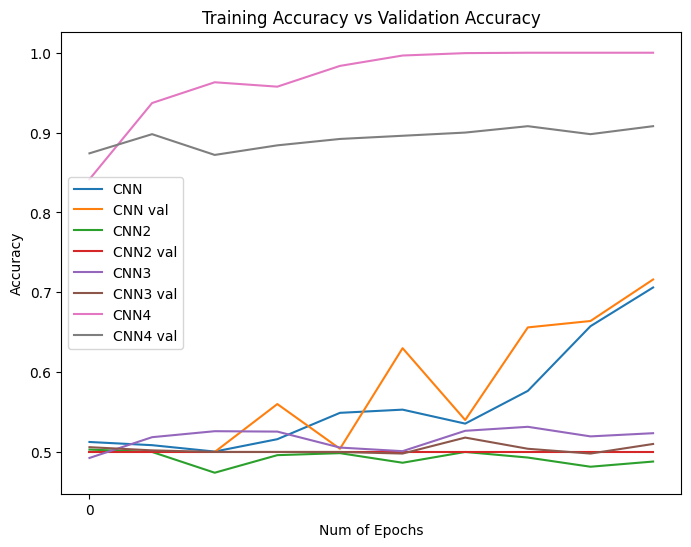

In [70]:
histories = {"CNN": cnn.history, "CNN2": cnn_2.history, "CNN3": cnn_3.history, "CNN4": cnn_4.history}

plt.figure(0)
for name, history in histories.items():
    plt.plot(history['acc'], label=name)
    plt.plot(history['val_acc'], label=name + ' val')
plt.xticks(np.arange(0, 20, 100))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend()


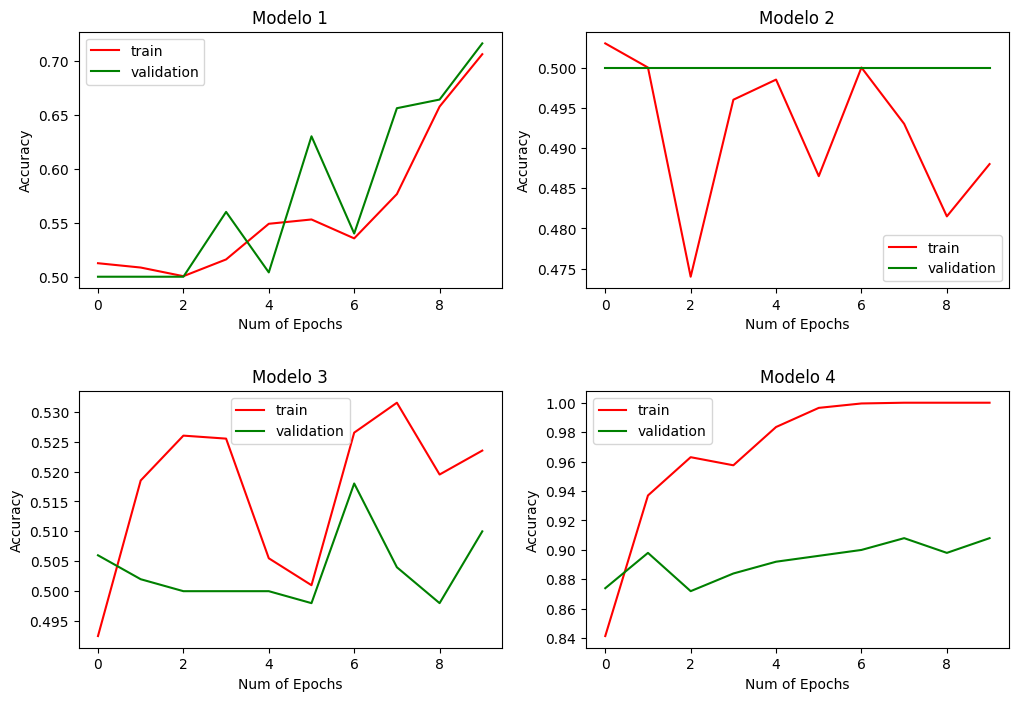

In [71]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Graficar la precisión de entrenamiento y validación para cada modelo
axs[0, 0].plot(cnn.history['acc'], 'r')
axs[0, 0].plot(cnn.history['val_acc'], 'g')
axs[0, 0].set_xlabel("Num of Epochs")
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_title("Modelo 1")
axs[0, 0].legend(['train', 'validation'])

axs[0, 1].plot(cnn_2.history['acc'], 'r')
axs[0, 1].plot(cnn_2.history['val_acc'], 'g')
axs[0, 1].set_xlabel("Num of Epochs")
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_title("Modelo 2")
axs[0, 1].legend(['train', 'validation'])

axs[1, 0].plot(cnn_3.history['acc'], 'r')
axs[1, 0].plot(cnn_3.history['val_acc'], 'g')
axs[1, 0].set_xlabel("Num of Epochs")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].set_title("Modelo 3")
axs[1, 0].legend(['train', 'validation'])

axs[1, 1].plot(cnn_4.history['acc'], 'r')
axs[1, 1].plot(cnn_4.history['val_acc'], 'g')
axs[1, 1].set_xlabel("Num of Epochs")
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].set_title("Modelo 4")
axs[1, 1].legend(['train', 'validation'])

# Ajustar la separación entre subplots
plt.subplots_adjust(hspace=0.4)

# Mostrar el gráfico
plt.show()
